In [3]:
pip install KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11798 sha256=26290ee0a2741c115fdb2f356339c5db540759b88a42f7cf08dd9e4026785d03
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [4]:
#Un biólogo ha recogido muestras de flores en una expedición y ha registrado las longitudes de los pétalos y de los sépalos, aunque es difícil poder categorizarlas. 
#Al parecer son de la misma especie, pero se notan algunas diferencias entre ellas. Por eso, nos ha pedido ayuda

import pandas as pd
import numpy as np
import sklearn
from numpy import unique

from numpy import where
from sklearn import datasets as ds
from matplotlib import pyplot

In [15]:
#Carga Datset y Drop target

iris = ds.load_iris()
irisDF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
irisDF.describe()
true_labels = irisDF.target 
#drop target
irisDF.drop("target", axis=1, inplace=True)
irisDF.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Standard Scaler!! Que no me iba scatter -> array.... is an invalid key
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(irisDF)

Cluster: 0 candiad de casos: 47
(array([ 50,  51,  52,  56,  65,  70,  75,  76,  77,  85,  86, 100, 102,
       103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118,
       120, 122, 124, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137,
       139, 140, 141, 143, 144, 145, 147, 148]),)
Cluster: 1 candiad de casos: 50
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)
Cluster: 2 candiad de casos: 53
(array([ 53,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,
        68,  69,  71,  72,  73,  74,  78,  79,  80,  81,  82,  83,  84,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       101, 106, 113, 114, 119, 121, 123, 126, 133, 134, 138, 142, 146,
       149]),)


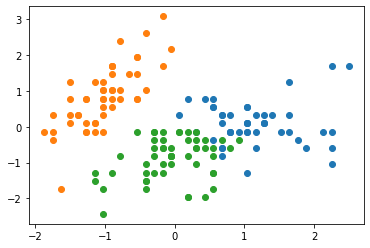

internos
calinski_harabasz_score:  241.90440170183157
silhouette_score:  0.45994823920518635
davies_bouldin_score:  0.8335949464754338
Externos
Rand Index:  0.8322147651006712
MI5:  0.724124474669687
AMI5:  0.6552228479234871
NMI5;  0.659486892724918


In [19]:
#Clustering con k-means
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score #internos
from sklearn.metrics import rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score #externos

model = KMeans(3)
yhat = model.fit_predict(X)
clusters=unique(yhat)
Labels= model.labels_

for cluster in clusters: 
    print("Cluster: {0} candiad de casos: {1}". format(cluster, len(yhat[yhat==cluster])))
    row_ix = where(yhat == cluster)
    print(row_ix)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()
#Métricas validez
print("internos")
print("calinski_harabasz_score: ", calinski_harabasz_score(X, model.labels_))
print("silhouette_score: ", silhouette_score(X, model.labels_))
print("davies_bouldin_score: ", davies_bouldin_score(X, model.labels_))
print("Externos")
Rand = rand_score(true_labels, Labels)
print("Rand Index: ", Rand)
#informacióin mutua
MI5 = mutual_info_score(true_labels, model.labels_)
print("MI5: ", MI5)
AMI5 = adjusted_mutual_info_score(true_labels, model.labels_)
print("AMI5: ",AMI5)
NMI5 = normalized_mutual_info_score(true_labels, model.labels_)
print("NMI5; ", NMI5)



Cluster: 0 cantidad de casos: 50
Cluster: 1 cantidad de casos: 56
Cluster: 2 cantidad de casos: 44


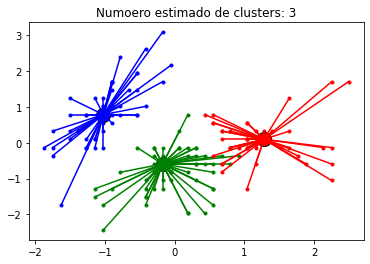

internos
calinski_harabasz_score:  239.7482681281416
silhouette_score:  0.4590416105554613
davies_bouldin_score:  0.8384547897989041
Externos
Rand Index:  0.8322147651006712
MI5:  0.7330481055080653
AMI5:  0.6645574046389925
NMI5;  0.6687135213085517


In [20]:
#Clustering con AfinityPropagation
from sklearn.cluster import AffinityPropagation
from itertools import cycle
import matplotlib.pyplot as plt
model = AffinityPropagation(preference = -50, damping = 0.9, random_state=0)
af = model.fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters = len(cluster_centers_indices)
plt.close("all")
plt.figure(1)
plt.clf()
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters), colors):
  class_members = labels == k
  cluster_center = X[cluster_centers_indices[k]]
  plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
  plt.plot(
      cluster_center[0],
      cluster_center[1],
      "o",
      markerfacecolor=col, 
      markeredgecolor="k",
      markersize=14,
  )
  print("Cluster: {0} cantidad de casos: {1}". format(k, (len(X[class_members, k]))))
  for x in X[class_members]:
    plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    

plt.title("Numoero estimado de clusters: %d" % n_clusters)
plt.show()
#Métricas validez
print("internos")
print("calinski_harabasz_score: ", calinski_harabasz_score(X, model.labels_))
print("silhouette_score: ", silhouette_score(X, model.labels_))
print("davies_bouldin_score: ", davies_bouldin_score(X, model.labels_))
print("Externos")
Rand = rand_score(true_labels, Labels)
print("Rand Index: ", Rand)
#informacióin mutua
MI5 = mutual_info_score(true_labels, model.labels_)
print("MI5: ", MI5)
AMI5 = adjusted_mutual_info_score(true_labels, model.labels_)
print("AMI5: ",AMI5)
NMI5 = normalized_mutual_info_score(true_labels, model.labels_)
print("NMI5; ", NMI5)


Cluster: 0 cantidad de casos: 92
Cluster: 1 cantidad de casos: 50
Cluster: 2 cantidad de casos: 8


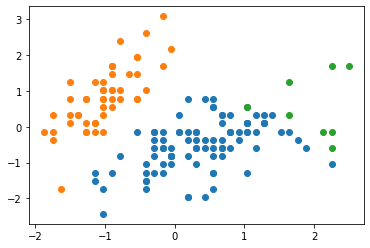

internos
calinski_harabasz_score:  163.7137970765523
silhouette_score:  0.43251408537574937
davies_bouldin_score:  0.8130957495595507
Externos
Rand Index:  0.8322147651006712
MI5:  0.6758037896734229
AMI5:  0.6991153273179985
NMI5;  0.703605822177199


In [21]:
#Mean Shift
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import statistics as stat

#Definir modelo pasar parametro bandwidth and bin_seeding
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=150)
model = MeanShift(bandwidth= bandwidth, bin_seeding=True)
#Clustering y retornar el cluster asignado a cada caso
yhat = model.fit_predict(X)
#REcuperar Lusters
clusters=unique(yhat)
for cluster in clusters:
  print("Cluster: {0} cantidad de casos: {1}". format(cluster, (len(yhat[yhat==cluster]))))
  row_ix=where(yhat==cluster)
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()
#Métricas validez
print("internos")
print("calinski_harabasz_score: ", calinski_harabasz_score(X, model.labels_))
print("silhouette_score: ", silhouette_score(X, model.labels_))
print("davies_bouldin_score: ", davies_bouldin_score(X, model.labels_))
print("Externos")
Rand = rand_score(true_labels, Labels)
print("Rand Index: ", Rand)
#informacióin mutua
MI5 = mutual_info_score(true_labels, model.labels_)
print("MI5: ", MI5)
AMI5 = adjusted_mutual_info_score(true_labels, model.labels_)
print("AMI5: ",AMI5)
NMI5 = normalized_mutual_info_score(true_labels, model.labels_)
print("NMI5; ", NMI5)
